In [1]:
# import basic libraries 
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# import plot libraries 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

# BIG MART SALES DATASET

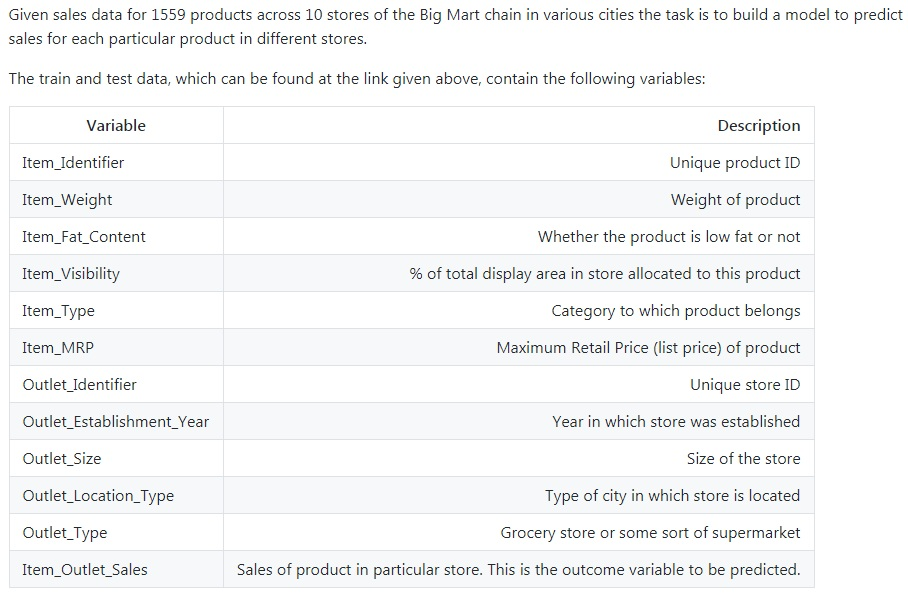

In [2]:
from IPython.display import Image
path = "C:\\Users\\Thanh\\Documents\\Data mining\\Data_Mining_Lab04\\"
Image(filename= path + "BigMartSales01.jpg")

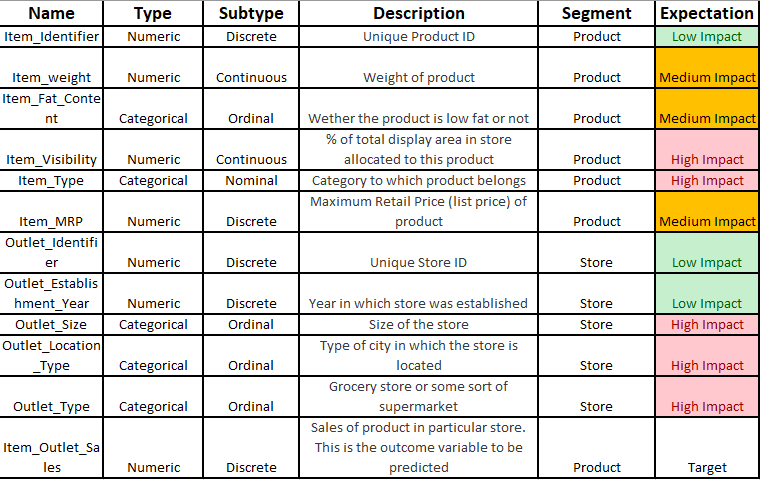

In [3]:
Image(filename= path + "BigMartSales02.png") 

In [4]:
# Read data
data = pd.read_csv(path + "BigMartSales.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


- Cột "Item_Weight" có ít giá trị (count) hơn các cột còn lại, 7060 so với 8523. Việc này chứng tỏ có 1463 giá trị bị khuyết ở đây

In [7]:
#Check for duplicates
idsUnique = len(set(data.Item_Identifier))
idsTotal = data.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 6964 duplicate IDs for 8523 total entries


array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

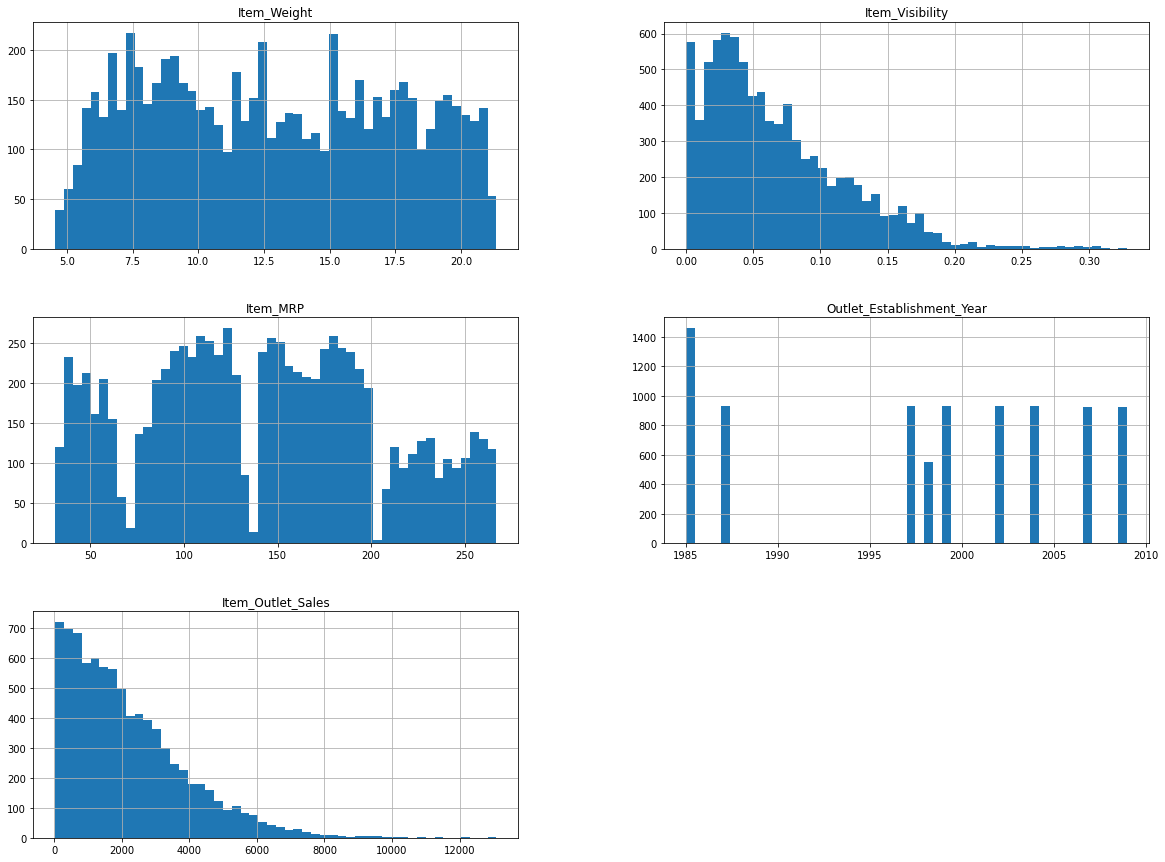

In [8]:
data.hist(bins=50, figsize=(20, 15))

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

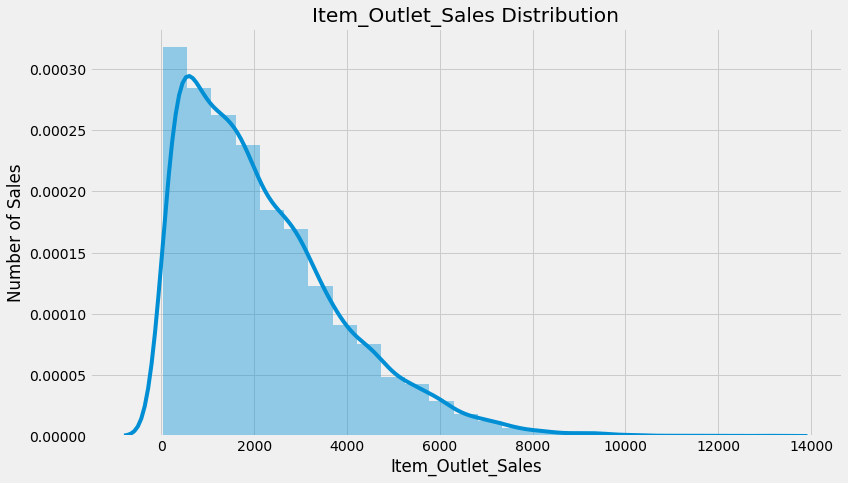

In [9]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Item_Outlet_Sales, bins = 25)
#plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [10]:
print ("Skew is:", data.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % data.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542798
Kurtosis: 1.615877


In [11]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [12]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<AxesSubplot:>

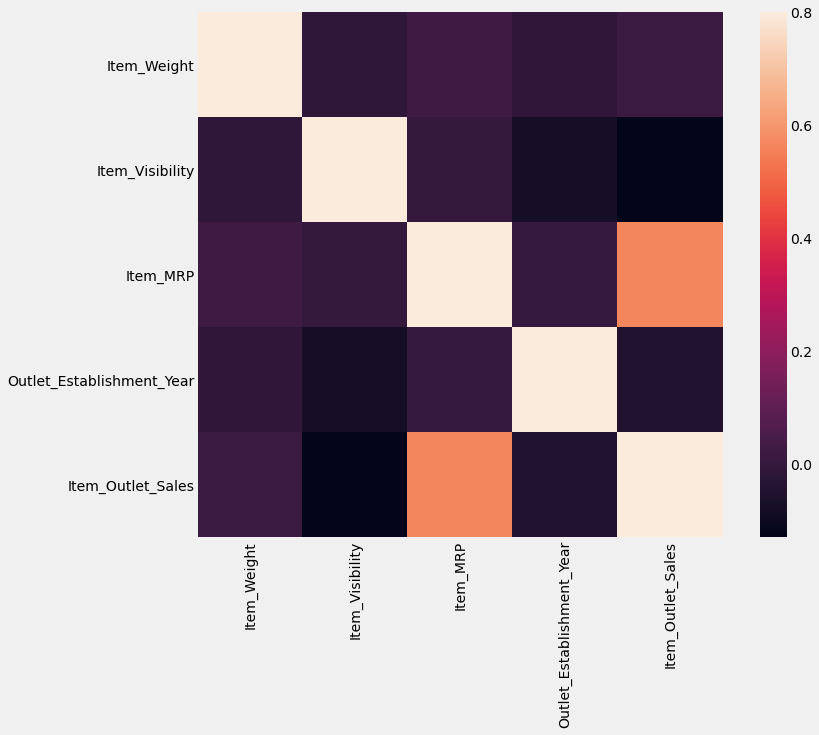

In [13]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True)

#### Item_Fat_Content

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

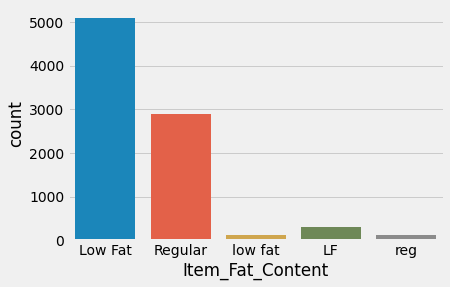

In [14]:
sns.countplot(data.Item_Fat_Content)

For Item_Fat_Content there are two possible choices : “Low Fat” or “Regular”. However, in our data we have these two types of Fat writen in different manners. This must be corrected

#### Item_Type

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

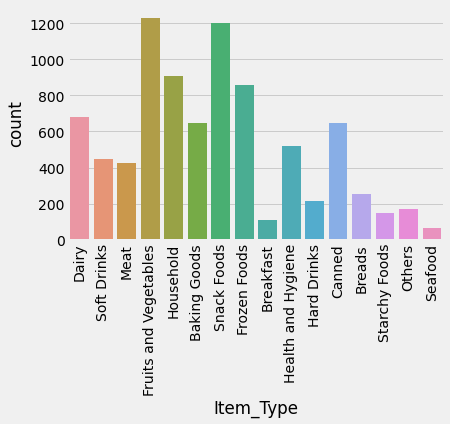

In [15]:
sns.countplot(data.Item_Type)
plt.xticks(rotation=90)

Looking at the list of Item_Type we see there are sixteen different types. This is a high number of unique values for a categorical variable. Therefore we must try to think of a way to drastically reduce this number

#### Outlet_Size

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

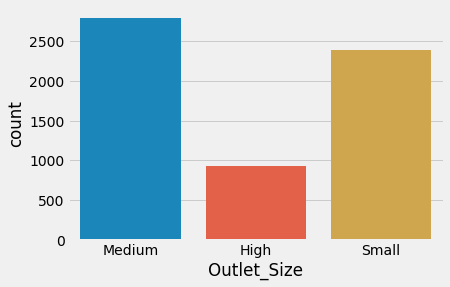

In [16]:
sns.countplot(data.Outlet_Size)

There seems to be a low number of stores with size equals to “High”. Most of the existent stores seem to be either “Small” or “Medium”. It will be interesting to see how this variable relates to our target. If “High” size stores have better results as initially expected or due to this number distribution sales results might be similar.

#### Outlet_Location_Type 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

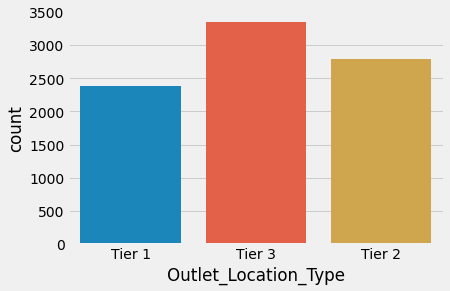

In [17]:
sns.countplot(data.Outlet_Location_Type)

Bigmart appears to be a supermarket brand that is more present in “Small” to “Medium” size cities than in more densily populated locations.



#### Outlet_Type 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

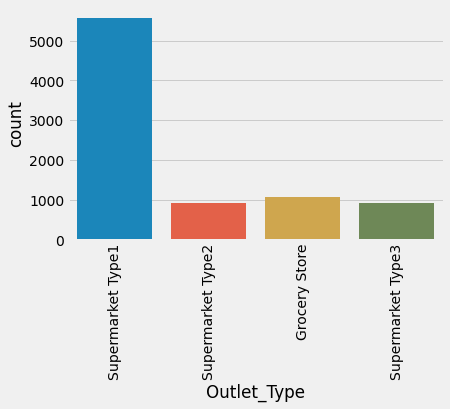

In [18]:
sns.countplot(data.Outlet_Type)
plt.xticks(rotation=90)

It looks like Supermarket Type2 , Grocery Store and Supermarket Type3 all have low expression in this distribution. Maybe we can create a single category with all of the three. Nevertheless, before doing this we must see their impact in the Item_Outlet_Sales .

Firstly we individually analysed some of the existent features, now it is time to understand the relationship between our target variable and predictors as well as the relationship among predictors

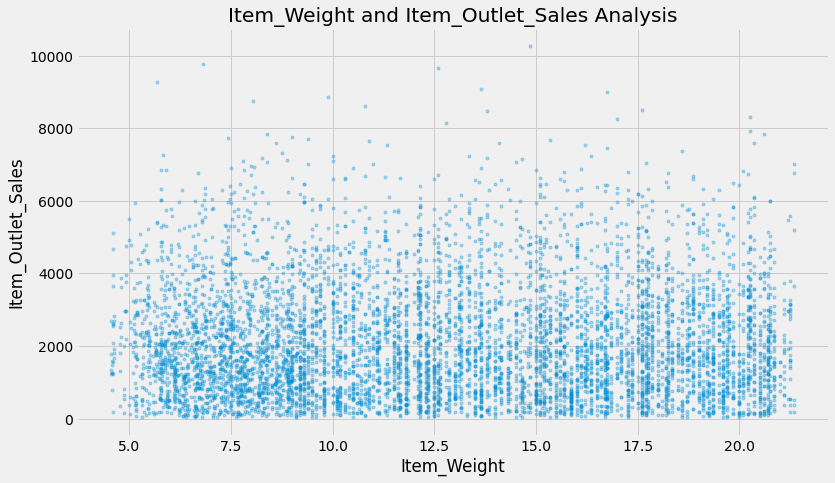

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Weight, data["Item_Outlet_Sales"],'.', alpha = 0.3)

We saw previously that Item_Weight had a low correlation with our target variable. If we plot both features we can see that relationship

#### Item_Weight 

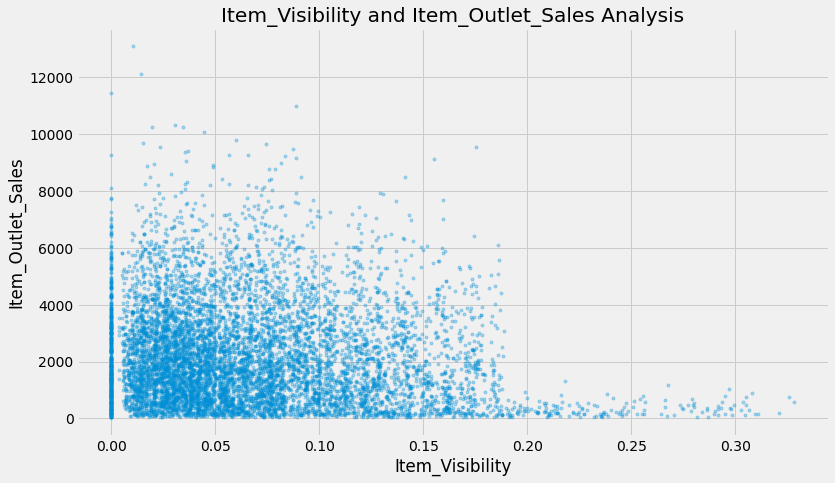

In [20]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(data.Item_Visibility, data["Item_Outlet_Sales"],'.', alpha = 0.3)

Visibility in Store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.

This was the assumption made… however, first the correlation and now this plot chart, indicate that the more visible a product is the less higher its sales will be. This might be due to the fact that a great number of daily use products, which do not need high visibility, control the top of the sales chart. As we can see from the bar charts below, most sold products have lower visibility. Furthermore, there is a concerning number of products with visibility zero.

#### Outlet_Establishment_Year và Item_Outlet_Sales

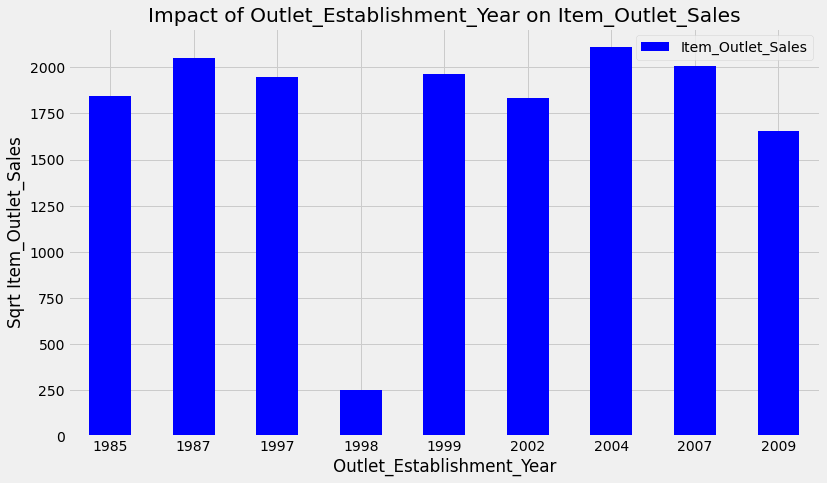

In [21]:
Outlet_Establishment_Year_pivot = \
data.pivot_table(index='Outlet_Establishment_Year', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Establishment_Year_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Establishment_Year")
plt.ylabel("Sqrt Item_Outlet_Sales")
plt.title("Impact of Outlet_Establishment_Year on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

There seems to be no significant meaning between the year of store establishment and the sales for the items. 1998 has low values but thet might be due to the fact the few stores opened in that year.

####  Item_Fat_Content và Item_Outlet_Sales

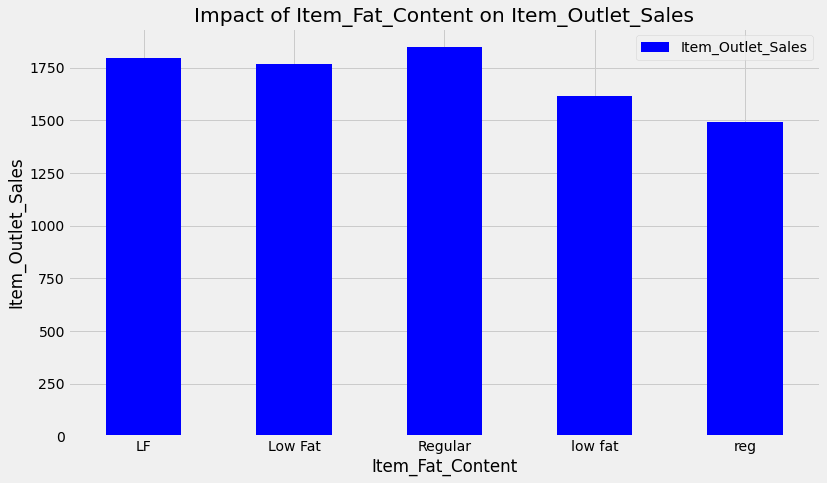

In [22]:
Item_Fat_Content_pivot = \
data.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)
Item_Fat_Content_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Daily use products should have a higher tendency to sell as compared to the specific use products. “Low Fat” products seem to have higher sales values than “Regular” products.

#### Outlet_Identifier và Item_Outlet_Sales

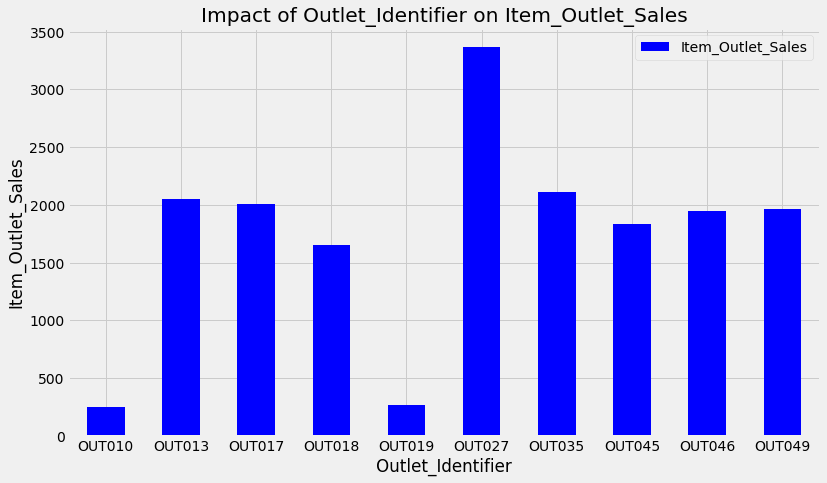

In [23]:
Outlet_Identifier_pivot = \
data.pivot_table(index='Outlet_Identifier', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Cửa hàng có mã ID là OUT027 có doanh số bán hàng cao nhất và OUT010 thấp nhất, tiếp theo là đến cửa hàng OUT019.

In [24]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Identifier',aggfunc=lambda x:x.mode())

Outlet_Identifier,OUT010,OUT013,OUT017,OUT018,OUT019,OUT027,OUT035,OUT045,OUT046,OUT049
Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type1,Supermarket Type2,Grocery Store,Supermarket Type3,Supermarket Type1,Supermarket Type1,Supermarket Type1,Supermarket Type1


In [25]:
data.pivot_table(values='Outlet_Type', columns='Outlet_Size',aggfunc=lambda x:x.mode())

Outlet_Size,High,Medium,Small
Outlet_Type,Supermarket Type1,Supermarket Type3,Supermarket Type1


From the ten stores, two are Groceries whereas six are Supermarket Type1, one Supermarket Type2 and one Supermarket Type3. You can get this information from the pivot_tables below.

From the above bar chart, we see that thr groceries (“OUT010”, “OUT019”) have the lowest sales results which is expected followed by the Supermarket Type 2 (“OUT018”). Curiously, most stores are of type Supermarket Type1 of size “High” and do not have the best results. The best results belong to “Out027” which is a “Medium” size Supermarket Type 3.

####  Outlet_Size và Item_Outlet_Sales

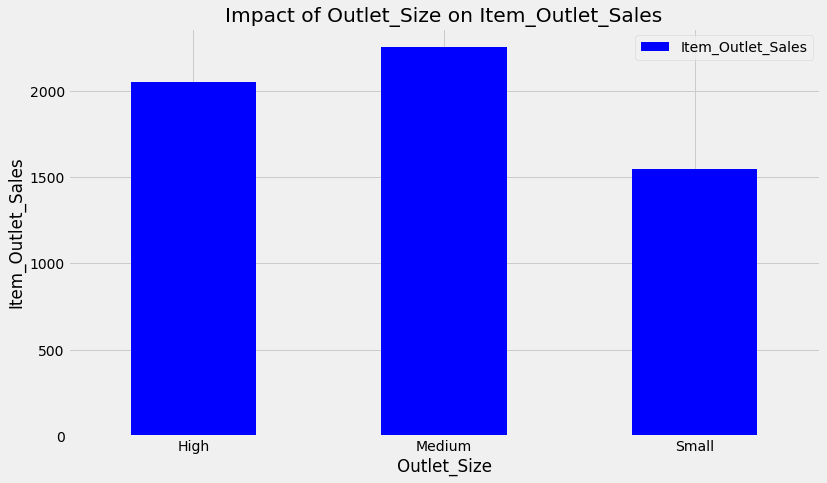

In [26]:
Outlet_Size_pivot = \
data.pivot_table(index='Outlet_Size', values='Item_Outlet_Sales', aggfunc=np.median)
Outlet_Size_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Size")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Size on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In the beginning, our belief was that stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place. According to the results, this is almost the case. Curiously, consumers tend to prefer medium size stores instead of big size. As we saw in the previous section, most stores have size “Medium” but still the “High” and “Small” stores which are clearly in an inferior number can beat or even come close to their numbers

#### Outlet_Type và Item_Outlet_Sales

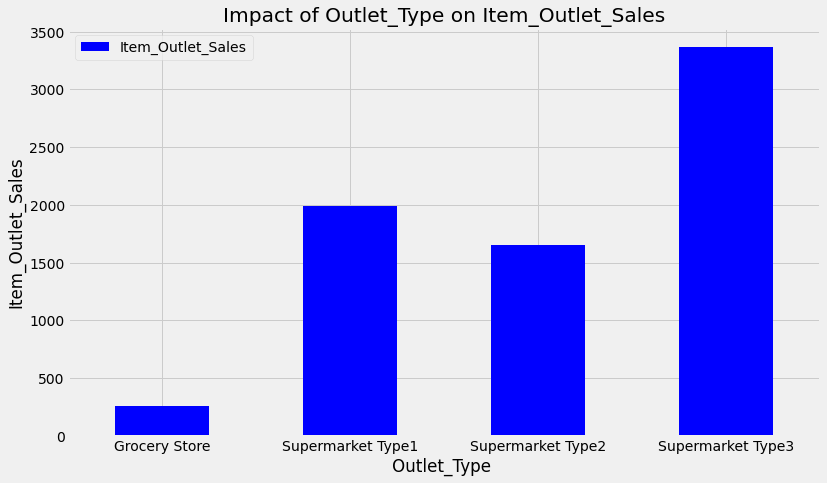

In [27]:
Outlet_Type_pivot = \
data.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

Supermarket Type3 thì có doanh thhu cao nhất và cửa hàng tạp hóa có doanh thu thấp nhất.

####  Outlet_Location_Type và Item_Outlet_Sales

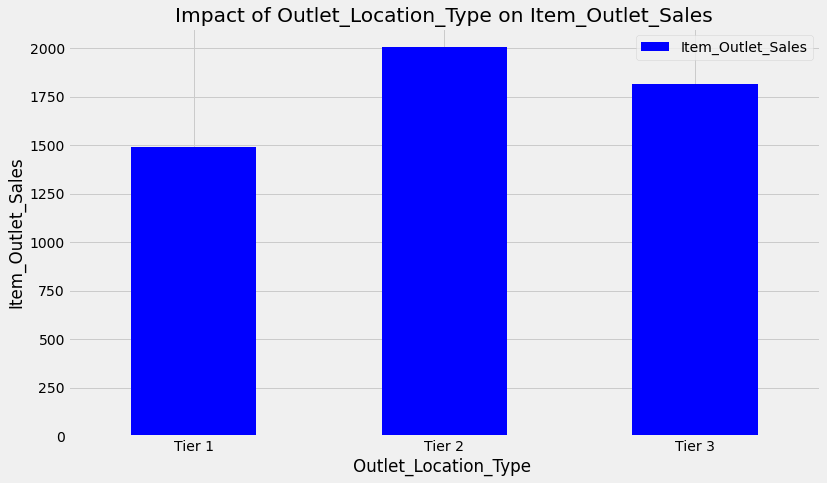

In [28]:
Outlet_Location_Type_pivot = \
data.pivot_table(index='Outlet_Location_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Location_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Location_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Location_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [29]:
data.pivot_table(values='Outlet_Location_Type', columns='Outlet_Type',aggfunc=lambda x:x.mode())

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Location_Type,Tier 3,Tier 2,Tier 3,Tier 3


Do Tier 1 cities have higher sales? This was one of the premisses we made in the start of this study. However, if we look at our results we see that in fact it is stores from Tier 2 cities that present the highest results, followed by Tier 3 cities and with Tier 1 cities with the lowest results of the three type of locations.

From the pivot_table it is easy to see that Tier2 and Tier3 cities are those that have highest representation of stores.

During our EDA we were able to take some conclusions regarding our first assumptions and the available data:

Regarding the variables which were thought to have high impact on the product’s sale price.

Item_Visibility does not have a high positive correlation as expected, quite the opposite. As well, there are no big variations in the sales due to theItem_Type . On the other hand, it was possible to see that the size, location and type of store could have a positive impact on sales.

If we look at variable Item_Identifer , we can see different groups of letters per each product such as ‘FD’ (Food), ‘DR’(Drinks) and ‘NC’ (Non-Consumable). From this we can create a new variable.

Regarding Item_Visibility there are items with the value zero. This does not make lot of sense, since this is indicating those items are not visible on the store.

Similar, Item_Weight and Outlet_Size seem to present NaN values.

There seems to be 1562 unique items only available in a single store.

Item_Fat_Content has vale “low fat” writen in different manners.

For Item_Type we try to create a new feature that does not have 16 unique values.

Outlet_Establishment_Year besides being a hidden category, its values vary from 1985 to 2009 . It must be converted to how old the store is to better see the impact on sales.

In [30]:
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [31]:
#aggfunc is mean by default! Ignores NaN by default
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')
print(item_avg_weight.head())

                 Item_Weight
Item_Identifier             
DRA12                 11.600
DRA24                 19.350
DRA59                  8.270
DRB01                  7.390
DRB13                  6.115


In [32]:
data["Outlet_Size"] = data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])
data["Item_Weight"] = data["Item_Weight"].fillna(np.nanmedian(data["Item_Weight"]))
#Check the percentage of null values per variable
data.isnull().sum()/data.shape[0]*100 #show values in percentage

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [33]:
#Creates pivot table with Outlet_Type and the mean of #Item_Outlet_Sales. Agg function is by default mean()
data.pivot_table(values='Item_Outlet_Sales', columns='Outlet_Type')

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


Liệu việc kết hợp Siêu thị Loại 2 và Loại 3 có khả thi không? Hãy kiểm tra.

Theo quan sát của kết quả bên trên, doanh số bán sản phẩm trung bình khác nhau đáng kể, vì vậy chúng tôi để nguyên

In [34]:
# thay giá trị 0 bằng giá trị trung bình trên 'Item_Visibility'
print ('Original #zeros: %d'%sum(data['Item_Visibility'] == 0))
data['Item_Visibility']=data['Item_Visibility'].replace(0,data['Item_Visibility'].mean())
print ('Final #zeros: %d'%sum(data['Item_Visibility'] == 0))

Original #zeros: 526
Final #zeros: 0


In [35]:
#Remember the data is from 2013
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    8523.000000
mean       15.168133
std         8.371760
min         4.000000
25%         9.000000
50%        14.000000
75%        26.000000
max        28.000000
Name: Outlet_Years, dtype: float64

We talked about using how long has been working instead of the date of start. Remember that the data we have is from 2013. Thus we must consider this year into our calculations

In [36]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              6125
Non-Consumable    1599
Drinks             799
Name: Item_Type_Combined, dtype: int64

In [37]:
#Change categories of low fat:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())
print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    5517
Regular    2889
reg         117
Name: Item_Fat_Content, dtype: int64


In [38]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       2889
Non-Edible    1599
reg            117
Name: Item_Fat_Content, dtype: int64

In [39]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [40]:
#Dummy Variables:
data = pd.get_dummies(data, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Item_Fat_Content_3             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [41]:
data.shape

(8523, 36)

In [42]:
# Split Train and Test and check shape 
def SplitTrainAndTest(data, TrainRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = data.sample(frac=TrainRate, random_state=1)
    # gets the left out portion of the dataset
    testing = data.loc[~data.index.isin(training.index)]

    data_train = training.drop(TargetAtt, 1)
    label_train = training[[TargetAtt]]
    data_test = testing.drop(TargetAtt, 1)
    label_test = testing[[TargetAtt]]

    PrintTrainTestInfo(data_train, label_train, data_test, label_test)
    return data_train, label_train, data_test, label_test
    
def PrintTrainTestInfo(data_train, label_train, data_test, label_test):
  print("Train shape : ", data_train.shape)
  print("Test shape : ", data_test.shape)

In [43]:
from sklearn.preprocessing import LabelEncoder
EncoderAttList = ["Item_Type"]

data_encoder = data.copy()
for att in EncoderAttList:
  data_encoder[att] = LabelEncoder().fit_transform(data_encoder[att])

data_encoder = data_encoder.drop(['Item_Identifier', 'Outlet_Identifier'], 1)  

display(data_encoder.info())
display(data_encoder.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Visibility            8523 non-null   float64
 2   Item_Type                  8523 non-null   int32  
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Item_Outlet_Sales          8523 non-null   float64
 6   Outlet_Years               8523 non-null   int64  
 7   Item_Fat_Content_0         8523 non-null   uint8  
 8   Item_Fat_Content_1         8523 non-null   uint8  
 9   Item_Fat_Content_2         8523 non-null   uint8  
 10  Item_Fat_Content_3         8523 non-null   uint8  
 11  Outlet_Location_Type_0     8523 non-null   uint8  
 12  Outlet_Location_Type_1     8523 non-null   uint8  
 13  Outlet_Location_Type_2     8523 non-null   uint8

None

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,9.300,0.016047,4,249.8092,1999,3735.1380,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,5.920,0.019278,14,48.2692,2009,443.4228,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,17.500,0.016760,10,141.6180,1999,2097.2700,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,19.200,0.066132,6,182.0950,1998,732.3800,15,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0.066132,9,53.8614,1987,994.7052,26,0,1,0,...,0,1,0,0,0,0,0,0,0,0
5,10.395,0.066132,0,51.4008,2009,556.6088,4,0,0,1,...,0,0,0,1,0,0,0,0,0,0
6,13.650,0.012741,13,57.6588,1987,343.5528,26,0,0,1,...,0,1,0,0,0,0,0,0,0,0
7,12.600,0.127470,13,107.7622,1985,4022.7636,28,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8,16.200,0.016687,5,96.9726,2002,1076.5986,11,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,19.200,0.094450,5,187.8214,2007,4710.5350,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [44]:
data_train, label_train, data_test, label_test = SplitTrainAndTest(data_encoder, 0.7, 'Item_Outlet_Sales')
FeatureList = data_train.columns.to_list()
TargetAtt = 'Item_Outlet_Sales'
print(FeatureList)

Train shape :  (5966, 33)
Test shape :  (2557, 33)
['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Years', 'Item_Fat_Content_0', 'Item_Fat_Content_1', 'Item_Fat_Content_2', 'Item_Fat_Content_3', 'Outlet_Location_Type_0', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2', 'Outlet_Size_0', 'Outlet_Size_1', 'Outlet_Size_2', 'Outlet_Type_0', 'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Item_Type_Combined_0', 'Item_Type_Combined_1', 'Item_Type_Combined_2', 'Outlet_0', 'Outlet_1', 'Outlet_2', 'Outlet_3', 'Outlet_4', 'Outlet_5', 'Outlet_6', 'Outlet_7', 'Outlet_8', 'Outlet_9']


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

LRModel = LinearRegression(normalize=True)
Model = LRModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1120.796415691565
R2 score is 0.564994127521591


The model performance for testing set
--------------------------------------
RMSE is 1143.8588297753236
R2 score is 0.5591342796375506




In [46]:
PredictDF = data_test[FeatureList].copy()
PredictDF[TargetAtt] = label_test
PredictDF["Predict"] = label_test_predict
PredictDF = PredictDF.reset_index(drop=False)

display(PredictDF.head())

,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,4009.0
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2339.0
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1599.0
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,3161.0
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,978.0


In [47]:
from sklearn.tree import DecisionTreeRegressor
DTModel = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
Model = DTModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1059.6692730036987
R2 score is 0.6111497918107782


The model performance for testing set
--------------------------------------
RMSE is 1102.0288371483964
R2 score is 0.590788913298389




In [48]:
from sklearn.ensemble import RandomForestRegressor
RFModel = RandomForestRegressor(n_estimators=100,max_depth=8, min_samples_leaf=150, random_state=123)
Model = RFModel

Model.fit(data_train[FeatureList], label_train)
# model evaluation for training set
label_train_predict = Model.predict(data_train[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
r2 = r2_score(label_train, label_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
label_test_predict = Model.predict(data_test[FeatureList])
rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
r2 = r2_score(label_test, label_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 1082.7748756313142
R2 score is 0.5940075166392311


The model performance for testing set
--------------------------------------
RMSE is 1100.4067209004963
R2 score is 0.5919926920080002




In [49]:
def XGBRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  from xgboost import XGBRegressor

  XGBModel = XGBRegressor()
  XGBModel.fit(data_train[FeatureList], label_train)

  # model evaluation for training set
  label_train_predict = XGBModel.predict(data_train[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
  r2 = r2_score(label_train, label_train_predict)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  label_test_predict = XGBModel.predict(data_test[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
  r2 = r2_score(label_test, label_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  PredictDF = data_test[FeatureList].copy()
  PredictDF[TargetAtt] = label_test
  PredictDF["Predict"] = label_test_predict
  PredictDF = PredictDF.reset_index(drop=False)

  print("The the predict table result : ")
  print("--------------------------------------")
  display(PredictDF.head(10))
  
  return XGBModel, PredictDF

def PredictXGBRegressor(XGBModel, FeatureSample, TrueLabel = ""):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)

  label_predict = XGBModel.predict(FeatureSample)
  
  
  DirectPredictDF = FeatureSample.copy()
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = label_predict
  DirectPredictDF = DirectPredictDF.reset_index(drop=False)
  
  print("\n")
  print("The the predict table result : ")
  print("--------------------------------------")
  display(DirectPredictDF.head(10))
  
  return DirectPredictDF

In [50]:
XGBModel, PredictDF = XGBRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt)

The model performance for training set
--------------------------------------
RMSE is 614.2910013938962
R2 score is 0.8693257668881639


The model performance for testing set
--------------------------------------
RMSE is 1171.3830322237602
R2 score is 0.5376622754397132


The the predict table result : 
--------------------------------------


,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,5199.931641
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2229.471436
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1764.608398
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,2346.938965
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,725.533508
5,18,12.60,0.034238,7,113.2834,1985,28,1,0,0,...,0,0,0,1,0,0,0,0,2303.6680,3425.846924
6,20,18.85,0.138190,13,250.8724,1987,26,0,0,1,...,0,0,0,0,0,0,0,0,3775.0860,3316.099121
7,23,12.60,0.057557,0,107.6938,1985,28,1,0,0,...,0,0,1,0,0,0,0,0,214.3876,-0.501701
8,24,13.85,0.025896,5,165.0210,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,4078.0250,2508.994141
9,27,11.65,0.019356,7,39.1164,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,308.9312,505.168121


In [51]:
def LGBMRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt):
  from sklearn.metrics import mean_squared_error
  from sklearn.metrics import r2_score
  import lightgbm as lgb

  LGBMModel = lgb.LGBMRegressor()
  LGBMModel.fit(data_train[FeatureList], label_train)

  # model evaluation for training set
  label_train_predict = LGBMModel.predict(data_train[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_train, label_train_predict)))
  r2 = r2_score(label_train, label_train_predict)

  print("The model performance for training set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  # model evaluation for testing set
  label_test_predict = LGBMModel.predict(data_test[FeatureList])
  rmse = (np.sqrt(mean_squared_error(label_test, label_test_predict)))
  r2 = r2_score(label_test, label_test_predict)

  print("The model performance for testing set")
  print("--------------------------------------")
  print('RMSE is {}'.format(rmse))
  print('R2 score is {}'.format(r2))
  print("\n")

  PredictDF = data_test[FeatureList].copy()
  PredictDF[TargetAtt] = label_test
  PredictDF["Predict"] = label_test_predict
  PredictDF = PredictDF.reset_index(drop=False)

  print("The the predict table result : ")
  print("--------------------------------------")
  display(PredictDF.head(10))
  
  return LGBMModel, PredictDF

def PredictLGBMRegressor(LGBMModel, FeatureSample, TrueLabel = ""):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)

  label_predict = LGBMModel.predict(FeatureSample)
  
  
  DirectPredictDF = FeatureSample.copy()
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = label_predict
  DirectPredictDF = DirectPredictDF.reset_index(drop=False)
  
  print("\n")
  print("The the predict table result : ")
  print("--------------------------------------")
  display(DirectPredictDF.head(10))
  
  return DirectPredictDF

In [52]:
LGBMModel, PredictDF = LGBMRegressorApporach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt)

The model performance for training set
--------------------------------------
RMSE is 875.1532362733373
R2 score is 0.7347778084691572


The model performance for testing set
--------------------------------------
RMSE is 1103.7693069878824
R2 score is 0.5894953319581073


The the predict table result : 
--------------------------------------


,index,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Years,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9,Item_Outlet_Sales,Predict
0,0,9.30,0.016047,4,249.8092,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,3735.1380,4359.689835
1,2,17.50,0.016760,10,141.6180,1999,14,1,0,0,...,0,0,0,0,0,0,0,1,2097.2700,2058.257360
2,8,16.20,0.016687,5,96.9726,2002,11,0,0,1,...,0,0,0,0,0,1,0,0,1076.5986,1501.331377
3,14,16.35,0.068024,6,196.4426,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,1977.4260,2938.880478
4,15,9.00,0.069089,2,56.3614,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,1547.3192,843.346755
5,18,12.60,0.034238,7,113.2834,1985,28,1,0,0,...,0,0,0,1,0,0,0,0,2303.6680,3256.516532
6,20,18.85,0.138190,13,250.8724,1987,26,0,0,1,...,0,0,0,0,0,0,0,0,3775.0860,3361.693777
7,23,12.60,0.057557,0,107.6938,1985,28,1,0,0,...,0,0,1,0,0,0,0,0,214.3876,245.229397
8,24,13.85,0.025896,5,165.0210,1997,16,0,0,1,...,0,0,0,0,0,0,1,0,4078.0250,2732.693556
9,27,11.65,0.019356,7,39.1164,1987,26,1,0,0,...,0,0,0,0,0,0,0,0,308.9312,526.094768


# CUSTOMER CHURN DATASET

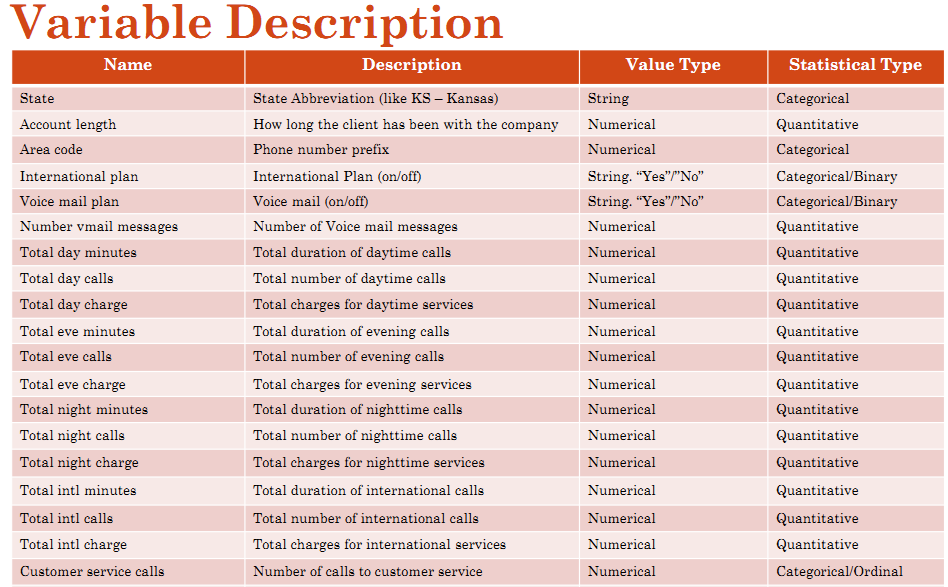

In [53]:
path = "C:\\Users\\Thanh\\Documents\\Data mining\\Data_Mining_Lab04\\"
Image(filename= path + "CustomerChurn.png")

In [54]:
# Read data
data = pd.read_csv('C:\\Users\\Thanh\\Documents\\Data mining\\Data_Mining_Lab04\\CustomerChurn.csv')
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [56]:
print(" List of unique values in State : ")
print(data['State'].unique())
print(" List of unique values in International plan : ")
print(data['International plan'].unique())
print(" List of unique values in Voice mail plan : ")
print(data['Voice mail plan'].unique())

#Special Field
print(" List of unique values in Area code : ")
print(data['Area code'].unique())

 List of unique values in State : 
['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']
 List of unique values in International plan : 
['No' 'Yes']
 List of unique values in Voice mail plan : 
['Yes' 'No']
 List of unique values in Area code : 
[415 408 510]


In [57]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [58]:
dataNChurn = data[data['Churn'] == False]
dataNChurn.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [59]:
dataNChurn.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
std,39.882350,42.306156,13.913125,50.181655,19.801157,8.530835,50.292175,19.958414,4.274863,51.105032,19.506246,2.299768,2.784489,2.441984,0.751784,1.163883
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,142.825000,87.000000,24.282500,164.500000,87.000000,13.980000,165.900000,87.000000,7.470000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,415.000000,0.000000,177.200000,100.000000,30.120000,199.600000,100.000000,16.970000,200.250000,100.000000,9.010000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,22.000000,210.300000,114.000000,35.750000,233.200000,114.000000,19.820000,234.900000,113.000000,10.570000,12.000000,6.000000,3.240000,2.000000
max,243.000000,510.000000,51.000000,315.600000,163.000000,53.650000,361.800000,170.000000,30.750000,395.000000,175.000000,17.770000,18.900000,19.000000,5.100000,8.000000


#### Total day minutes và Total day calls

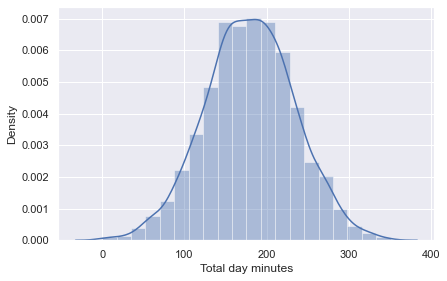

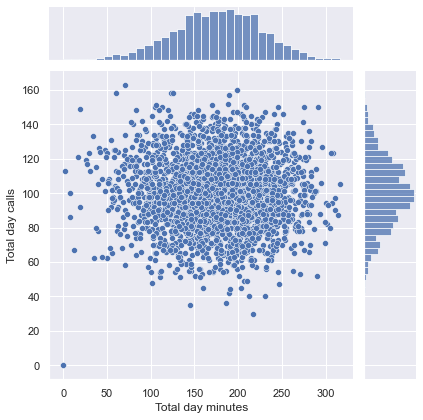

In [60]:
sns.set(color_codes=True)
sns.distplot(data['Total day minutes'], bins=20)
df = pd.DataFrame(dataNChurn, columns=['Total day minutes', 'Total day calls'])
df = df.reset_index(drop=True)
sns.jointplot(x='Total day minutes', y='Total day calls', data=df)

In [61]:
data.describe(include=['O'])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


#### State

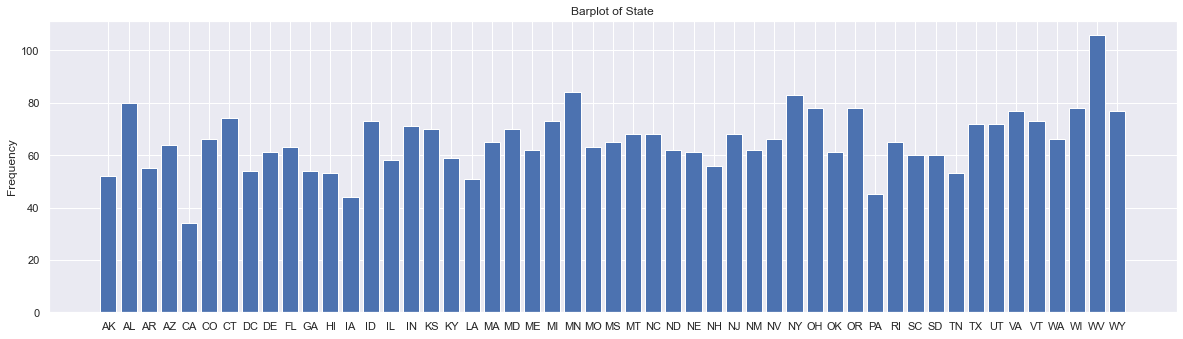

In [62]:
Distribution = data['State'].value_counts()
Distribution = pd.DataFrame({'State':Distribution.index, 'Freq':Distribution.values})
Distribution = Distribution.sort_values(by='State', ascending=True)
plt.subplots(figsize=(18,5))
plt.bar(Distribution['State'], Distribution["Freq"])
plt.xticks(Distribution['State'])
plt.ylabel('Frequency')
plt.title('Barplot of ' + 'State')
plt.show()

Các Customer của chúng ta phân bố đều các State chỉ có State WV là nhiều bất thường nhất

In [63]:
def DrawBoxplot2(DataFrame, xAtt, yAtt, hAtt="N/A"):
  plt.figure()
  plt.subplots(figsize=(10,5))
  if(hAtt == "N/A"):
    sns.boxplot(x=xAtt, y=yAtt,  data=DataFrame)
  else:
    sns.boxplot(x=xAtt, y=yAtt,  hue=hAtt,  data=DataFrame)
  plt.show()

####  Total day minutes

<Figure size 432x288 with 0 Axes>

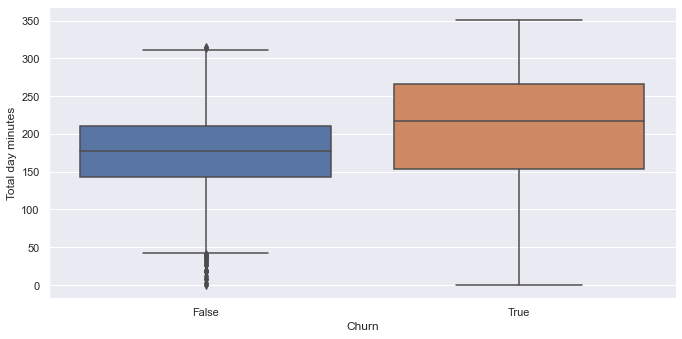

<Figure size 432x288 with 0 Axes>

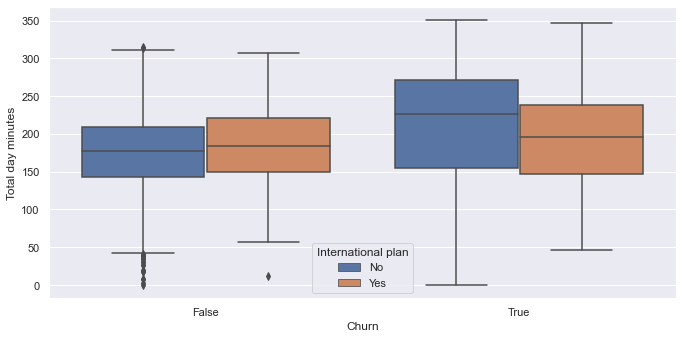

In [64]:
DrawBoxplot2(data, xAtt = 'Churn', yAtt='Total day minutes')
DrawBoxplot2(data, xAtt = 'Churn', yAtt='Total day minutes', hAtt = 'International plan')

In [65]:
def DrawCountplot(DataFrame, att, hatt="N/A"):
  if(hatt == "N/A"):
    sns.countplot(x=att, data=DataFrame)
  else:
    sns.countplot(x=att, hue=hatt, data=DataFrame)
  plt.show()
  
def DrawHistogram(DataFrame, att):
  import matplotlib.pyplot as plt
  plt.figure()
  DataFrame[att].hist(edgecolor='black', bins=20)
  plt.title(att)
  plt.show()

####  Area code theo Churn

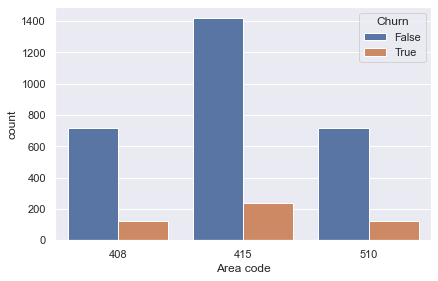

In [66]:
DrawCountplot(data, 'Area code', 'Churn')

####  Customer service calls theo Churn

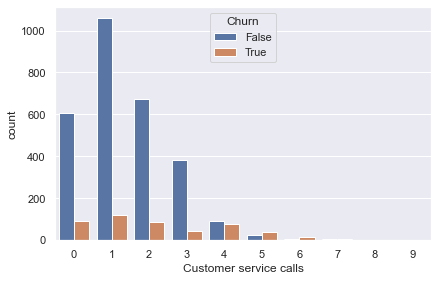

In [67]:
DrawCountplot(data, 'Customer service calls', 'Churn')

####  Account length

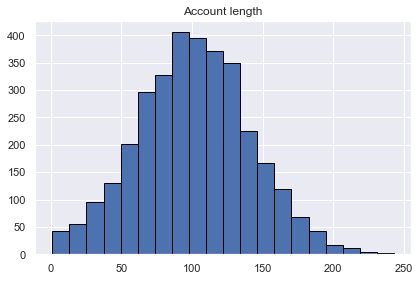

In [68]:
DrawHistogram(data,'Account length')

In [69]:
from sklearn.preprocessing import LabelEncoder
data_encoder = data.copy()
data_encoder['State'] = LabelEncoder().fit_transform(data_encoder['State'])
data_encoder['International plan'] = LabelEncoder().fit_transform(data_encoder['International plan'])
data_encoder['Voice mail plan'] = LabelEncoder().fit_transform(data_encoder['Voice mail plan'])
data_encoder = data_encoder.join(pd.get_dummies(data_encoder['Area code'], prefix='Area_code_'))
data_encoder = data_encoder.drop('Area code', axis=1)
data_encoder.head(10)

,State,Account length,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Area_code__408,Area_code__415,Area_code__510
0,16,128,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,False,0,1,0
1,35,107,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,False,0,1,0
2,31,137,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,False,0,1,0
3,35,84,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,False,1,0,0
4,36,75,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,False,0,1,0
5,1,118,1,0,0,223.4,98,37.98,220.6,101,...,118,9.18,6.3,6,1.70,0,False,0,0,1
6,19,121,0,1,24,218.2,88,37.09,348.5,108,...,118,9.57,7.5,7,2.03,3,False,0,0,1
7,24,147,1,0,0,157.0,79,26.69,103.1,94,...,96,9.53,7.1,6,1.92,0,False,0,1,0
8,18,117,0,0,0,184.5,97,31.37,351.6,80,...,90,9.71,8.7,4,2.35,1,False,1,0,0
9,49,141,1,1,37,258.6,84,43.96,222.0,111,...,97,14.69,11.2,5,3.02,0,False,0,1,0


In [70]:
ColumnList = data_encoder.columns
ColumnList = list(set(ColumnList) - set(['Churn'])) 
ColumnList.append('Churn') 
print(ColumnList)

['Voice mail plan', 'Total day minutes', 'Total eve charge', 'Total night charge', 'Total intl charge', 'Area_code__408', 'Area_code__415', 'Account length', 'Total night calls', 'Total eve minutes', 'Total eve calls', 'Total intl minutes', 'Total day charge', 'Number vmail messages', 'State', 'International plan', 'Customer service calls', 'Total day calls', 'Area_code__510', 'Total intl calls', 'Total night minutes', 'Churn']


In [71]:
data_encoder = data_encoder[ColumnList]
display(data_encoder.head(10))

,Voice mail plan,Total day minutes,Total eve charge,Total night charge,Total intl charge,Area_code__408,Area_code__415,Account length,Total night calls,Total eve minutes,...,Total day charge,Number vmail messages,State,International plan,Customer service calls,Total day calls,Area_code__510,Total intl calls,Total night minutes,Churn
0,1,265.1,16.78,11.01,2.70,0,1,128,91,197.4,...,45.07,25,16,0,1,110,0,3,244.7,False
1,1,161.6,16.62,11.45,3.70,0,1,107,103,195.5,...,27.47,26,35,0,1,123,0,3,254.4,False
2,0,243.4,10.30,7.32,3.29,0,1,137,104,121.2,...,41.38,0,31,0,0,114,0,5,162.6,False
3,0,299.4,5.26,8.86,1.78,1,0,84,89,61.9,...,50.90,0,35,1,2,71,0,7,196.9,False
4,0,166.7,12.61,8.41,2.73,0,1,75,121,148.3,...,28.34,0,36,1,3,113,0,3,186.9,False
5,0,223.4,18.75,9.18,1.70,0,0,118,118,220.6,...,37.98,0,1,1,0,98,1,6,203.9,False
6,1,218.2,29.62,9.57,2.03,0,0,121,118,348.5,...,37.09,24,19,0,3,88,1,7,212.6,False
7,0,157.0,8.76,9.53,1.92,0,1,147,96,103.1,...,26.69,0,24,1,0,79,0,6,211.8,False
8,0,184.5,29.89,9.71,2.35,1,0,117,90,351.6,...,31.37,0,18,0,1,97,0,4,215.8,False
9,1,258.6,18.87,14.69,3.02,0,1,141,97,222.0,...,43.96,37,49,1,0,84,0,5,326.4,False


In [72]:
# Split Train and Test and check shape 
def SplitTrainAndTest(data, TrainRate, TargetAtt):
    # gets a random TrainDataRate % of the entire set
    training = data.sample(frac=TrainRate, random_state=1)
    # gets the left out portion of the dataset
    testing = data.loc[~data.index.isin(training.index)]

    data_train = training.drop(TargetAtt, 1)
    label_train = training[[TargetAtt]]
    data_test = testing.drop(TargetAtt, 1)
    label_test = testing[[TargetAtt]]

    PrintTrainTestInfo(data_train, label_train, data_test, label_test)
    return data_train, label_train, data_test, label_test
    
def PrintTrainTestInfo(data_train, label_train, data_test, label_test):
  print("Train shape : ", data_train.shape)
  print("Test shape : ", data_test.shape)

In [73]:
data_train, label_train, data_test, label_test = SplitTrainAndTest(data_encoder, TrainRate = 0.7, TargetAtt = 'Churn')

Train shape :  (2333, 21)
Test shape :  (1000, 21)


In [74]:
def NaiveBayesLearning(DataTrain, TargetTrain):
    from sklearn.naive_bayes import GaussianNB
    NBModel = GaussianNB()
    NBModel.fit(DataTrain, TargetTrain.values.ravel())

    return NBModel

def NaiveBayesTesting(NBModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = NBModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)

    return Accuracy, PredictTest

In [75]:
def LogisticRegressionLearning(DataTrain, TargetTrain):
    # Apply the Logistic Regression
    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics
    logreg = LogisticRegression()
    # training by Logistic Regression
    logreg.fit(DataTrain, TargetTrain.values.ravel())

    return logreg

def LogisticRegressionTesting(LRModel,DataTest, TargetTest):
    # Testing and calculate the accuracy
    from sklearn.metrics import accuracy_score

    logreg = LRModel
    PredictTest = logreg.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Logistic regression accuracy: {:.3f}'.format(Accuracy))

    return Accuracy, PredictTest

In [76]:
def RandomForestLearning(DataTrain, TargetTrain):
    from sklearn.ensemble import RandomForestClassifier

    rf = RandomForestClassifier(n_estimators = 500)
    rf.fit(DataTrain, TargetTrain.values.ravel())

    return rf

def RandomForestTesting(RFModel,DataTest, TargetTest):
    from sklearn.metrics import accuracy_score

    PredictTest = RFModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))

    return Accuracy, PredictTest

In [77]:
def SVMLearning(DataTrain, TargetTrain, ClassifierType = " "):
    from sklearn.svm import SVC
    if(ClassifierType == 'Linear'):
        svc = SVC(kernel="linear", C=0.025)
#         print('SVM Linear processing')
    # Radial basis function kernel
    elif (ClassifierType == 'RBF'):
        svc = SVC(gamma=2, C=1)
#         print('SVM RBF processing')
    else:
        svc = SVC()
#         print('SVM Default processing')
    svc.fit(DataTrain, TargetTrain.values.ravel())
    return svc

def SVMTesting(SVMModel, DataTest, TargetTest):
    from sklearn.metrics import accuracy_score
    PredictTest = SVMModel.predict(DataTest)
    Accuracy = accuracy_score(TargetTest, PredictTest)
    # print('Support Vector Machine Accuracy: {:.3f}'.format(accuracy_score(TargetTest, PredictTest)))
    return Accuracy, PredictTest

In [78]:
X_train = data_train
y_train = label_train
X_test = data_test
y_test = label_test

In [79]:
NBModel = NaiveBayesLearning(X_train, y_train)
NBAccuracy,NBPredictTest = NaiveBayesTesting(NBModel,X_test, y_test)
print('Naive Bayes accuracy: {:.3f}'.format(NBAccuracy))

print(NBModel.predict_proba(X_test)[1,:])
print(NBPredictTest[1])
print(NBModel.predict_proba(X_test)[0,:])
print(NBPredictTest[0])

Naive Bayes accuracy: 0.868
[0.50111673 0.49888327]
False
[0.05378991 0.94621009]
True


In [80]:
LRModel = LogisticRegressionLearning(X_train, y_train)
LRAccuracy,LRPredictTest = LogisticRegressionTesting(LRModel,X_test, y_test)
print('Logistic Regression accuracy: {:.3f}'.format(LRAccuracy))

print(LRModel.predict_proba(X_test)[1,:])
print(LRPredictTest[1])
print(LRModel.predict_proba(X_test)[0,:])
print(LRPredictTest[0])

Logistic Regression accuracy: 0.846
[0.61860323 0.38139677]
False
[0.89159676 0.10840324]
False


In [81]:
RFModel = RandomForestLearning(X_train, y_train)
RFAccuracy,RFPredictTest = RandomForestTesting(RFModel,X_test, y_test)
print('Random Forest accuracy: {:.6f}'.format(RFAccuracy))

print(RFModel.predict_proba(X_test)[1,:])
print(RFPredictTest[1])
print(RFModel.predict_proba(X_test)[0,:])
print(RFPredictTest[0])

Random Forest accuracy: 0.951000
[0.454 0.546]
True
[0.916 0.084]
False


In [82]:
LiSVMModel = SVMLearning(X_train, y_train)
LiSVMAccuracy,LiSVMPredictTest = SVMTesting(LiSVMModel, X_test, y_test)
print('Linear SVM accuracy: {:.6f}'.format(LiSVMAccuracy))

RBFSVMModel = SVMLearning(X_train, y_train, 'RBF')
RBFSVMAccuracy,RBFSVMPredictTest = SVMTesting(RBFSVMModel, X_test, y_test)
print('RBF SVM accuracy: {:.6f}'.format(RBFSVMAccuracy))

Linear SVM accuracy: 0.847000
RBF SVM accuracy: 0.847000


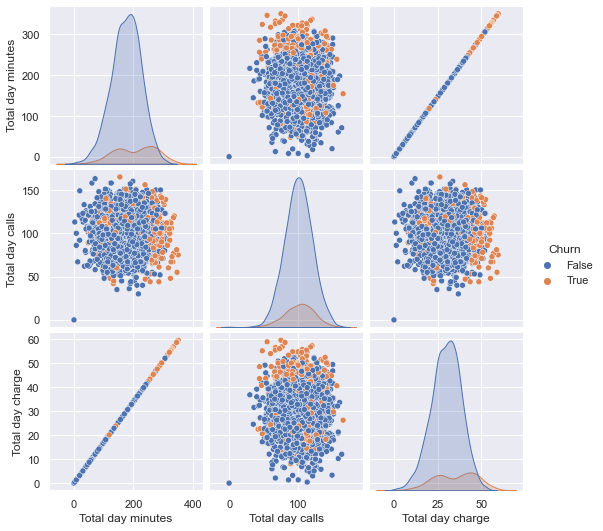

In [83]:
sns.pairplot(data, vars=["Total day minutes", "Total day calls", "Total day charge"], hue="Churn")

In [84]:
def DrawCorrelationMap(data, AttList):
  import seaborn as sns 
  correlation_matrix = data.loc[:,AttList].corr().round(2)
  print("Correlation Matrix : ")
  print(correlation_matrix.to_string())
  # annot = True to print the values inside the square
  sns.heatmap(data=correlation_matrix, cmap = 'coolwarm', annot=True)
  
  return correlation_matrix

Correlation Matrix : 
                     Total day minutes  Total day calls  Total day charge  Total night minutes  Total night calls  Total night charge
Total day minutes                 1.00             0.01              1.00                 0.00               0.02                0.00
Total day calls                   0.01             1.00              0.01                 0.02              -0.02                0.02
Total day charge                  1.00             0.01              1.00                 0.00               0.02                0.00
Total night minutes               0.00             0.02              0.00                 1.00               0.01                1.00
Total night calls                 0.02            -0.02              0.02                 0.01               1.00                0.01
Total night charge                0.00             0.02              0.00                 1.00               0.01                1.00


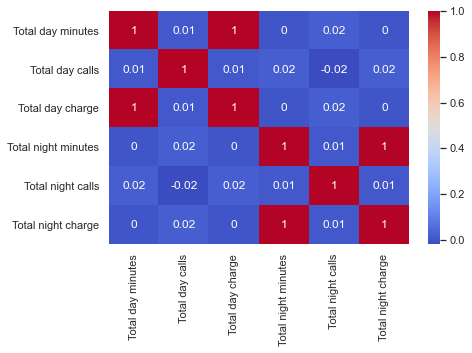

In [85]:
AttList = [ "Total day minutes", "Total day calls","Total day charge","Total night minutes","Total night calls","Total night charge"]
correlation_matrix = DrawCorrelationMap(data, AttList)

In [86]:
def BayesianMLApproach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt, TargetNames):
  import warnings
  warnings.filterwarnings("ignore")

  # Instantiate the classifier
  from sklearn.naive_bayes import GaussianNB
  BayesModel = GaussianNB()
  
  # Train classifier
  BayesModel.fit( data_train[FeatureList].values, label_train)
  y_pred = BayesModel.predict(data_test[FeatureList])

  # Print results
  RowsNum = data_test.shape[0]
  mislabeledNum =  (label_test[TargetAtt] != y_pred).sum()
  correctlabeledNum = RowsNum - mislabeledNum
  print("Number of correct labeled points out of a total {} points : {}"
        .format(RowsNum, correctlabeledNum))
  print("Number of mislabeled points out of a total {} points : {}"
        .format(RowsNum,mislabeledNum))
  print('Accuracy of classifier on training set: {:.2f}'
     .format(BayesModel.score(data_train[FeatureList], label_train)))
  print('Accuracy of classifier on test set: {:.2f}'
     .format(BayesModel.score(data_test[FeatureList], label_test)))
  
  ColumnNames = ["Proba_" + s for s in TargetNames]
  PredictDF = pd.DataFrame(BayesModel.predict_proba(data_test[FeatureList]), columns = ColumnNames)
  PredictDF["LabelTest"] = list(label_test[TargetAtt])
  PredictDF["Predict"] = y_pred
  print(PredictDF.head().to_string())
  
  return BayesModel, PredictDF

def PredictByBayesian(BayesModel, FeatureSample, TrueLabel, TargetNames):
  if isinstance(FeatureSample, pd.Series):
    FeatureSample = [FeatureSample]
  
  print(FeatureSample)
  
  ColumnNames = ["Proba_" + s for s in TargetNames]
  DirectPredictDF = pd.DataFrame(BayesModel.predict_proba(FeatureSample), columns = ColumnNames)
  DirectPredictDF["LabelTest"] = list(TrueLabel)
  DirectPredictDF["Predict"] = BayesModel.predict(FeatureSample)
  print(DirectPredictDF.head().to_string())
  
  return DirectPredictDF

In [87]:
FeatureList =["Account length", "Total day minutes", "Total day calls", "Customer service calls"]
TargetAtt = "Churn"
TargetNames = ["False", "True"]
BayesModel, PredictDF = BayesianMLApproach(data_train, label_train, data_test, label_test, FeatureList, TargetAtt,TargetNames)

Number of correct labeled points out of a total 1000 points : 863
Number of mislabeled points out of a total 1000 points : 137
Accuracy of classifier on training set: 0.87
Accuracy of classifier on test set: 0.86
   Proba_False  Proba_True  LabelTest  Predict
0     0.889552    0.110448      False    False
1     0.699394    0.300606      False    False
2     0.066446    0.933554       True     True
3     0.933008    0.066992      False    False
4     0.934733    0.065267      False    False


In [88]:
FeatureSample = data.loc[[0,3,5,6], FeatureList]
TargetNames = ["False", "True"]
TrueLabel = data.loc[[0,3,5,6], "Churn"]
DirectPredictDF = PredictByBayesian(BayesModel, FeatureSample ,TrueLabel , TargetNames)

   Account length  Total day minutes  Total day calls  Customer service calls
0             128              265.1              110                       1
3              84              299.4               71                       2
5             118              223.4               98                       0
6             121              218.2               88                       3
   Proba_False  Proba_True  LabelTest  Predict
0     0.815023    0.184977      False    False
1     0.574437    0.425563      False    False
2     0.889552    0.110448      False    False
3     0.816956    0.183044      False    False
